# 공공데이터 분석 2
https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15070282

## 가설
- 차대사람 사고가 차대차 사고보다 사망자수가 더 많을 것이다.
- 사망자수, 중상자수, 경상자수, 부상신고자수의 상관관계가 있을 것이다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


set_matplotlib_formats('retina')

%matplotlib inline

In [3]:
df = pd.read_csv("도로교통공단_사고유형별 교통사고 통계_20191231.csv", encoding="cp949")
df.shape

(17, 7)

In [4]:
df.head()

,사고유형_대분류,사고유형_중분류,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,18101,652,8943,8812,822
1,차대사람,차도통행중,4765,180,1944,2527,293
2,차대사람,길가장자리구역통행중,2705,41,816,1734,226
3,차대사람,보도통행중,2335,37,899,1398,170
4,차대사람,기타,18244,361,6258,11010,1554


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사고유형_대분류  17 non-null     object
 1   사고유형_중분류  17 non-null     object
 2   사고건수      17 non-null     int64 
 3   사망자수      17 non-null     int64 
 4   중상자수      17 non-null     int64 
 5   경상자수      17 non-null     int64 
 6   부상신고자수    17 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.1+ KB


In [6]:
df.columns

Index(['사고유형_대분류', '사고유형_중분류', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')

In [7]:
df.dtypes

사고유형_대분류    object
사고유형_중분류    object
사고건수         int64
사망자수         int64
중상자수         int64
경상자수         int64
부상신고자수       int64
dtype: object

In [8]:
df.describe()

,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,13505.882353,197.000000,4253.294118,14442.588235,1404.823529
std,22170.792611,197.639191,6274.616649,27334.161227,2410.499384
min,8.000000,1.000000,8.000000,5.000000,0.000000
25%,1141.000000,37.000000,343.000000,490.000000,170.000000
50%,3586.000000,116.000000,1654.000000,2527.000000,293.000000
75%,18101.000000,318.000000,6258.000000,8812.000000,822.000000
max,83508.000000,652.000000,23831.000000,99758.000000,8791.000000


## 가설 1

In [9]:
df.groupby(["사고유형_대분류"])["사망자수"].sum()

사고유형_대분류
차대사람     1271
차대차      1395
차량단독      681
철길건널목       2
Name: 사망자수, dtype: int64

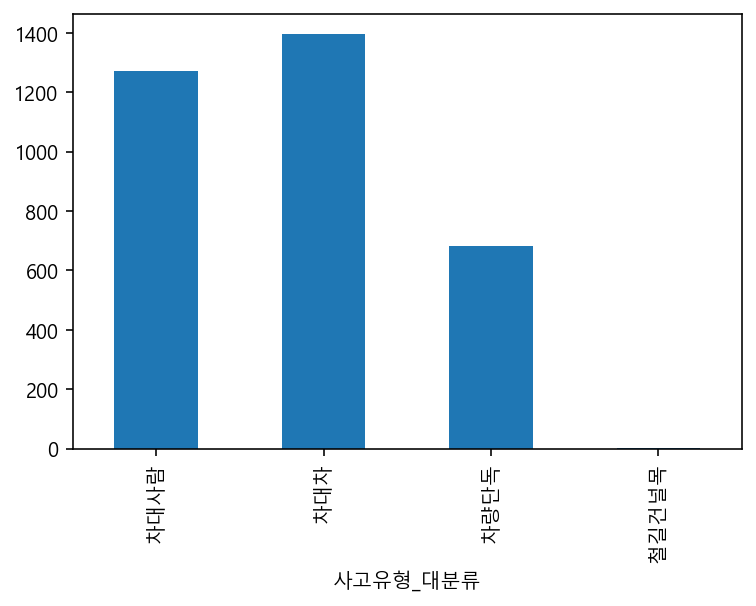

In [10]:
death = df.groupby(["사고유형_대분류"])["사망자수"].sum()  # type: Series
death.plot.bar()

In [11]:
# type: DataFrame
new_df = pd.DataFrame(death).transpose()
new_df.head()

사고유형_대분류,차대사람,차대차,차량단독,철길건널목
사망자수,1271,1395,681,2


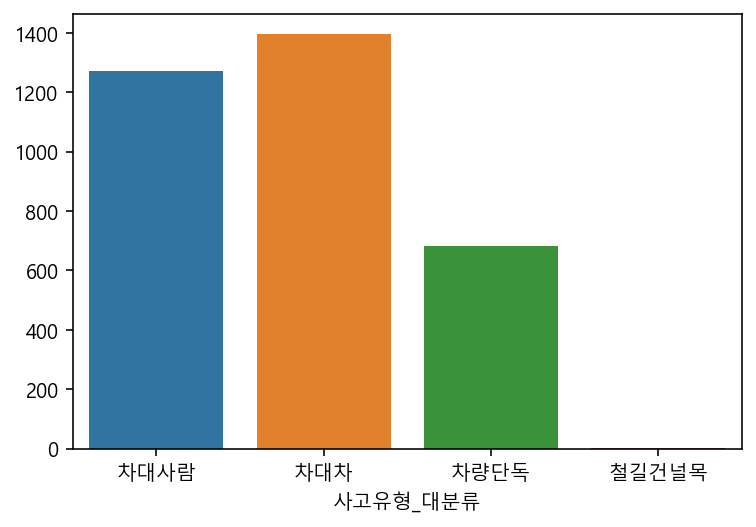

In [12]:
sns.barplot(data=new_df)

### Countplot으로 나타낸 결과, 차대사람 사고보다 차대차 사고의 사망자수가 더 많다.

## 가설 2

In [13]:
corr_columns = ["사망자수", "중상자수", "경상자수", "부상신고자수"]

In [14]:
df_corr = df[corr_columns].corr()
df_corr

,사망자수,중상자수,경상자수,부상신고자수
사망자수,1.000000,0.783940,0.604593,0.611410
중상자수,0.783940,1.000000,0.949225,0.953505
경상자수,0.604593,0.949225,1.000000,0.989429
부상신고자수,0.611410,0.953505,0.989429,1.000000


In [15]:
df_corr.loc[df_corr["사망자수"]>0.8, "사망자수"]

사망자수    1.0
Name: 사망자수, dtype: float64

In [16]:
df_corr.loc[df_corr["중상자수"]>0.8, "중상자수"]

중상자수      1.000000
경상자수      0.949225
부상신고자수    0.953505
Name: 중상자수, dtype: float64

In [17]:
df_corr.loc[df_corr["경상자수"]>0.8, "경상자수"]

중상자수      0.949225
경상자수      1.000000
부상신고자수    0.989429
Name: 경상자수, dtype: float64

In [18]:
df_corr.loc[df_corr["부상신고자수"]>0.8, "부상신고자수"]

중상자수      0.953505
경상자수      0.989429
부상신고자수    1.000000
Name: 부상신고자수, dtype: float64

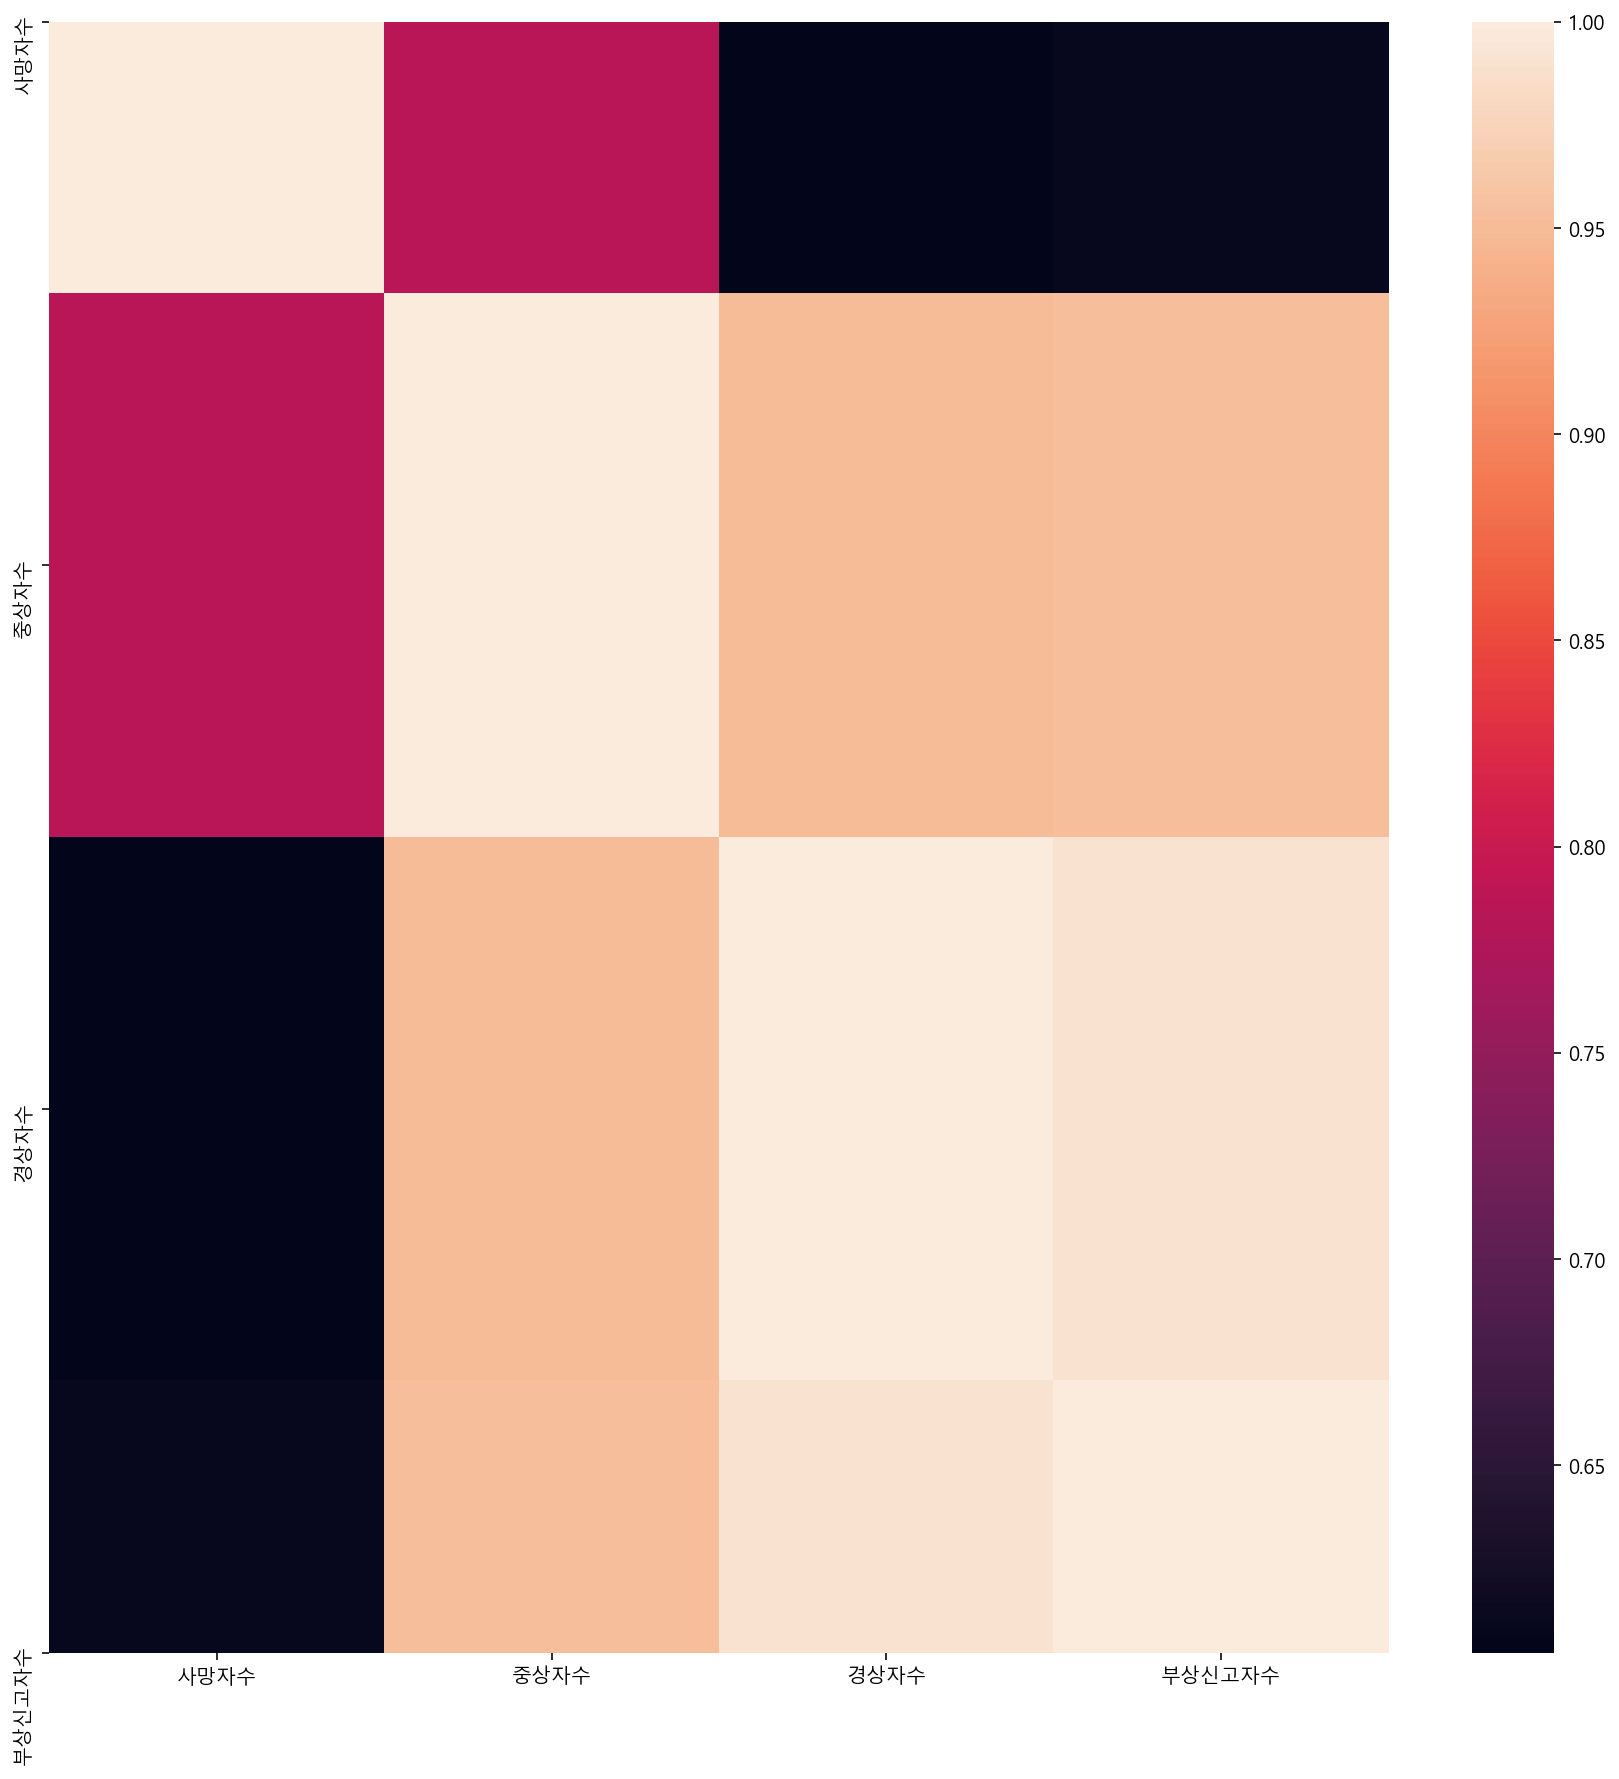

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr)

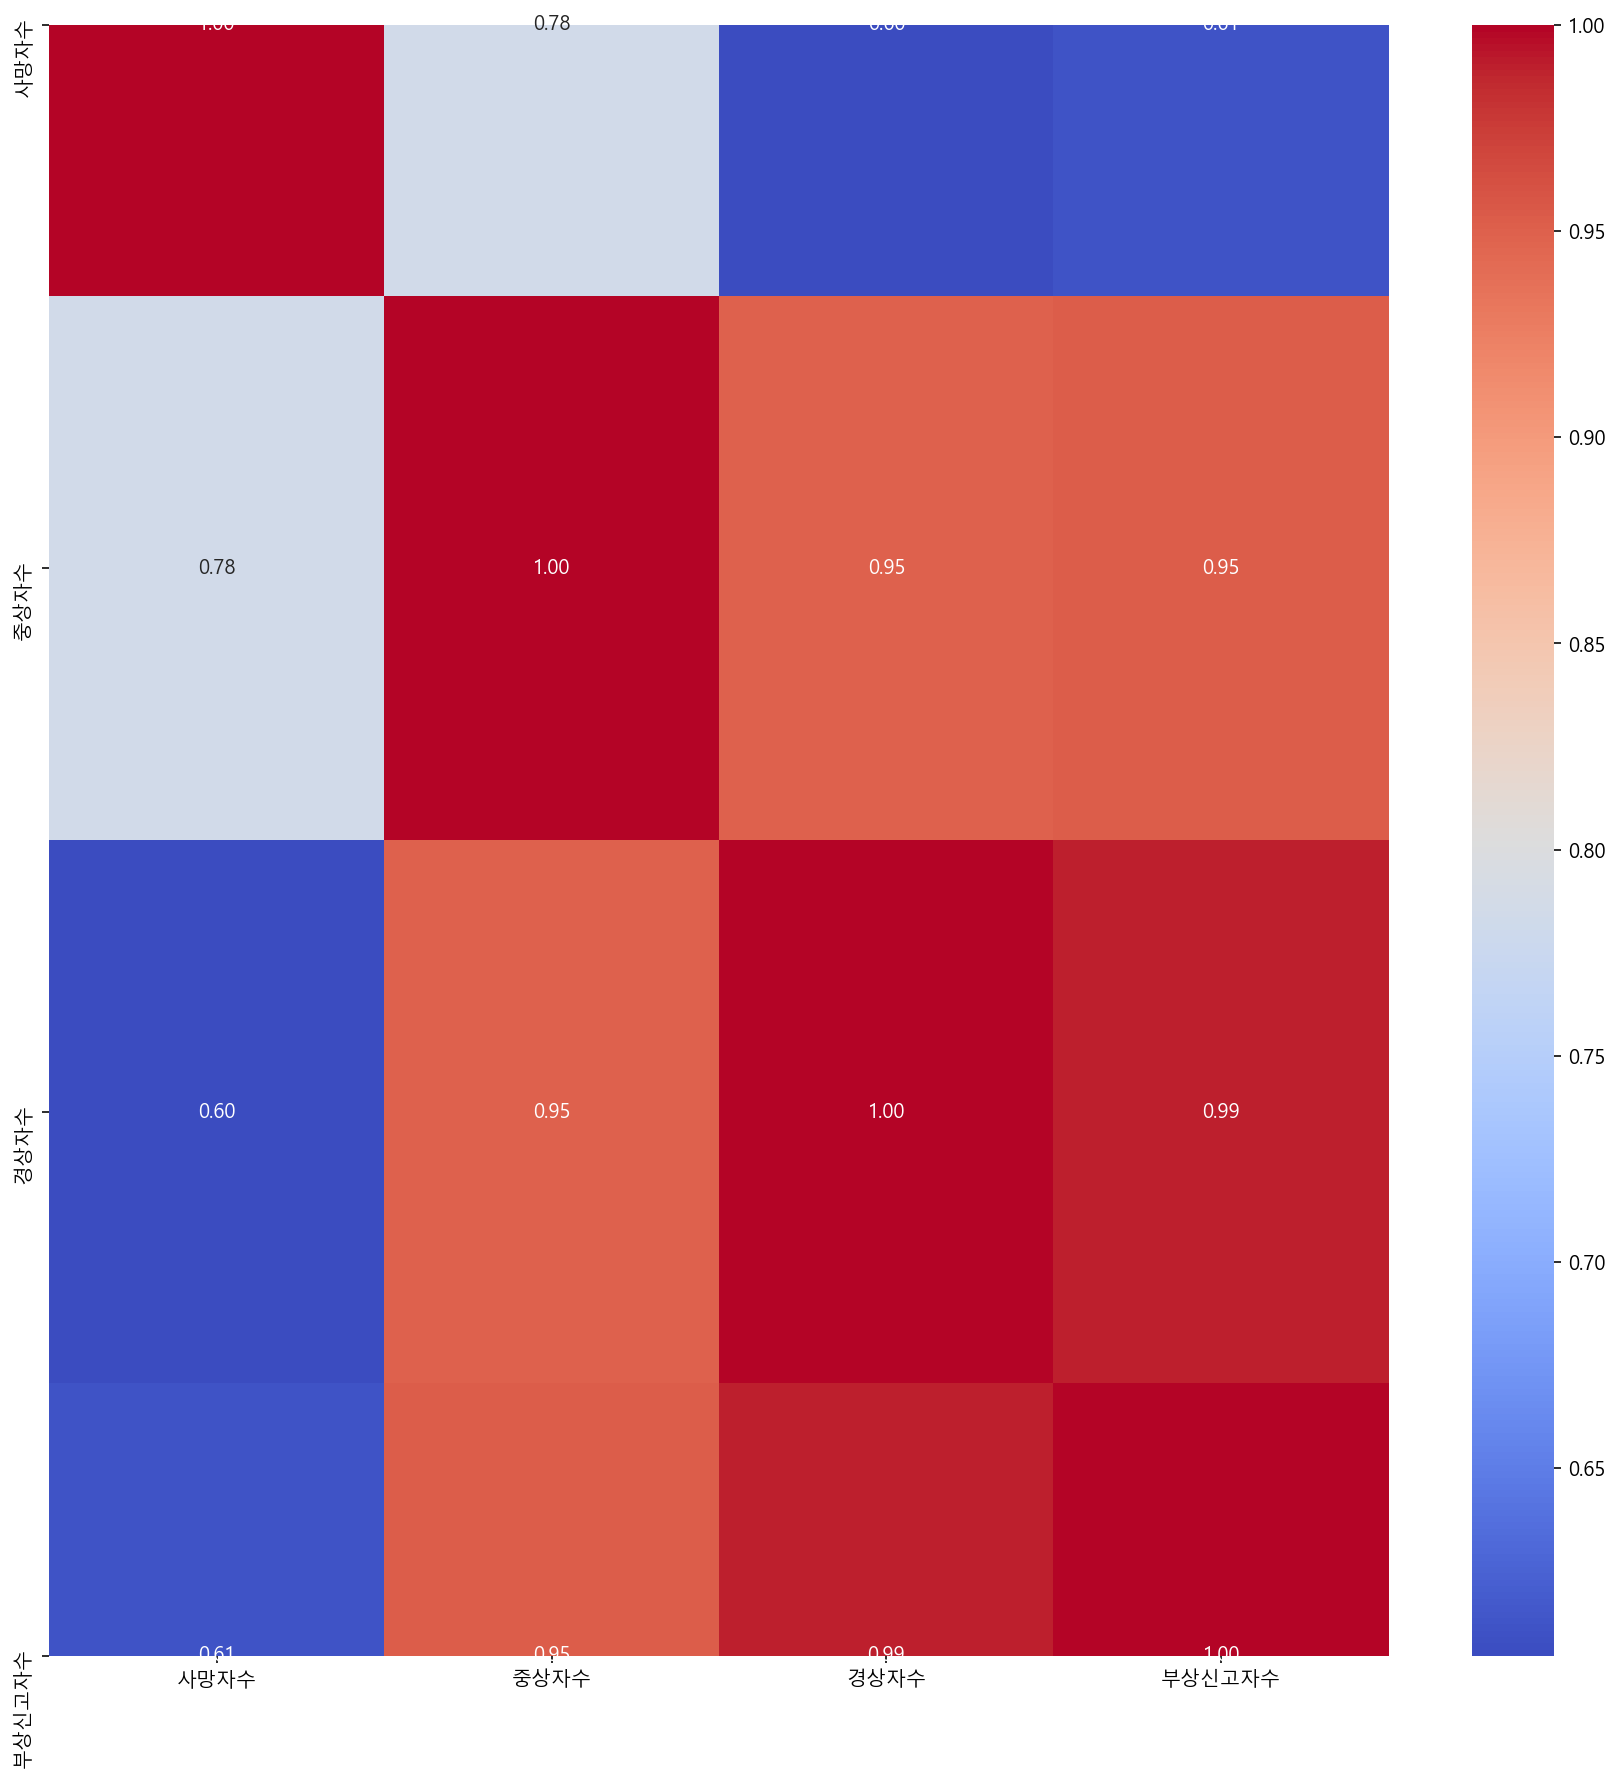

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr, annot=True, fmt='0.2f', cmap='coolwarm')

## Heatmap으로 나타낸 결과, 사망자수를 제외하고 나머지는 어느 정도 상관관계가 있다.